In [215]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import pickle
from matplotlib.ticker import MultipleLocator

In [330]:
def price_graph(ax, df):
    size = 20
    a = 0.6

    ax.plot(df.ts, df.price, zorder=1)
    
    buy_data = df[df.action<0]
    ax.scatter(buy_data.ts, buy_data.price, color='g', s=size, alpha=a, zorder=2, marker='x')
    
    sell_data = df[df.action>0]
    ax.scatter(sell_data.ts, sell_data.price, color='r', s=size, alpha=a, zorder=3, marker='x')
    
    ax.set_ylabel('price')
    
def action_graph(ax, df):
    buy_data = df[df.action<0]
    ax.bar(buy_data.ts, buy_data.action, color='g')
    
    sell_data = df[df.action>0]
    ax.bar(sell_data.ts, sell_data.action, color='r')
    
    ax.set_ylabel('action')
    
def profit_graph(ax, df):    
    for e in np.unique(df.episode):
        e_df = df[df.episode==e]
        #a = e_df.profit.cumsum()
        ax.plot(e_df.ts, e_df.bank, color='orange')
    
    ax.set_ylabel('bank')
    ax.set_xlabel('time step')

def graph(df, spacing):
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20,8), nrows=3, ncols=1, sharex=True, sharey=False)
    
    price_graph(ax1, df)
    action_graph(ax2, df)
    profit_graph(ax3, df)
    

    minorLocator = MultipleLocator(spacing)
    for ax in [ax1,ax2,ax3]:
        ax.xaxis.set_minor_locator(minorLocator)
        ax.grid(which = 'minor')
    
    plt.show()

In [310]:
fname = "saved_data/forced_explore2.pickle"
with open(fname, 'rb') as handle:
    df_explore = pickle.load(handle)
    
fname = "saved_data/unforced_explore2.pickle"
with open(fname, 'rb') as handle:
    df_unexplore = pickle.load(handle)

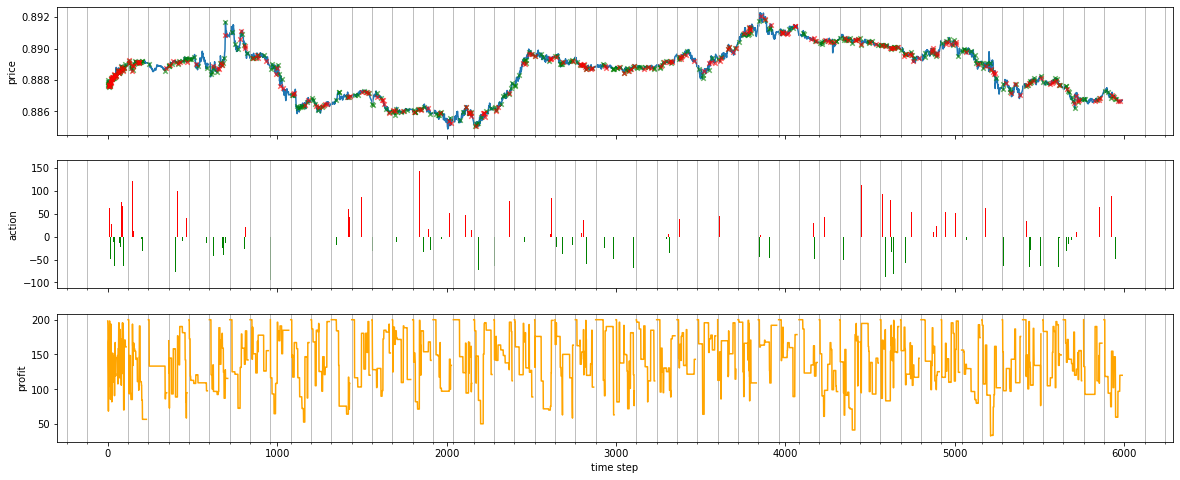

In [311]:
graph(df_explore, 120)

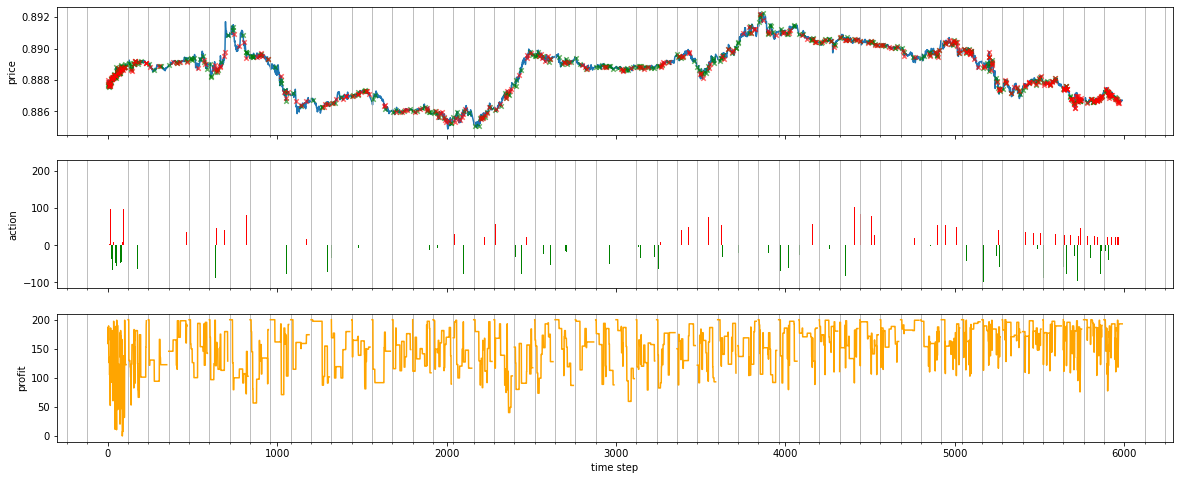

In [318]:
graph(df_unexplore, 120)

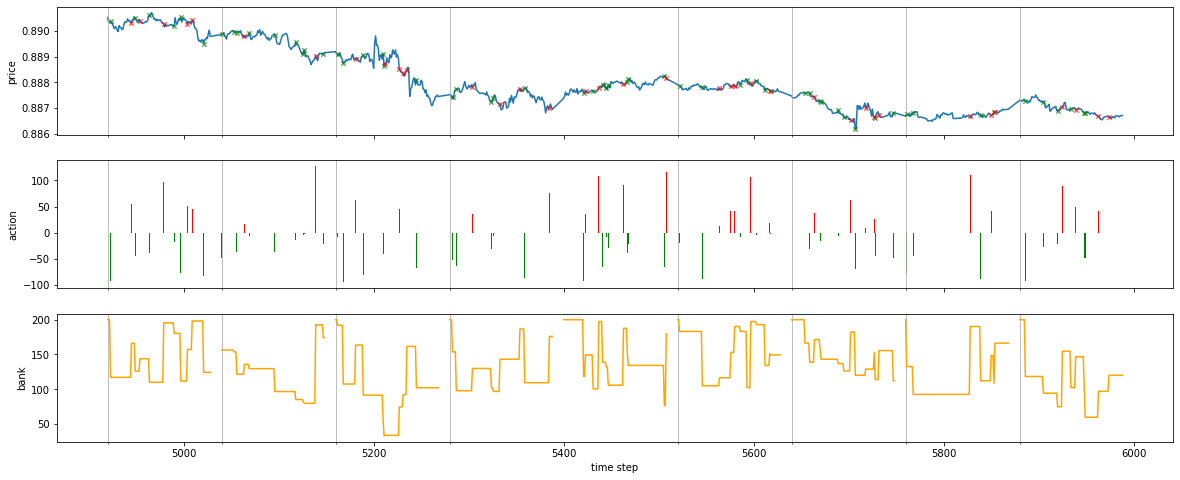

In [331]:
last = 10

ep = df_explore.episode.unique()[-last]
df_explore20 = df_explore[ df_explore.episode>ep]
df_unexplore20 = df_unexplore[ df_unexplore.episode>ep]

graph(df_explore20, 120)

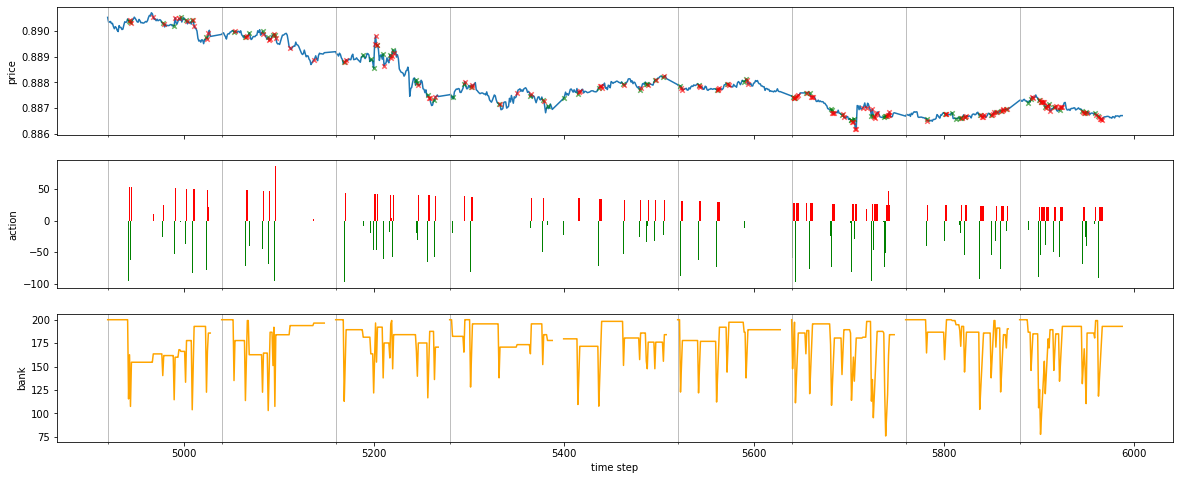

In [332]:
graph(df_unexplore20, 120)

In [326]:
a = df_explore[3000:]
a[a.action != 0]

,action,profit,ts,bank,inv,episode,price
3001,-6.0,0.00000,3298.0,125.34214,84.0,27.0,0.88923
3013,6.0,0.00210,3310.0,130.67698,78.0,27.0,0.88914
3019,-36.0,0.00000,3316.0,98.66578,114.0,27.0,0.88920
3026,-11.0,0.00000,3323.0,88.88557,125.0,27.0,0.88911
3028,94.0,0.01237,3325.0,172.47131,31.0,27.0,0.88921
...,...,...,...,...,...,...,...
5400,50.0,0.00000,5939.0,146.75051,60.0,49.0,0.88693
5409,-49.0,0.00000,5948.0,103.29633,109.0,49.0,0.88682
5410,-49.0,0.00000,5949.0,59.84264,158.0,49.0,0.88681
5424,42.0,0.00000,5963.0,97.08362,116.0,49.0,0.88669


In [327]:
b = df_unexplore[3000:]
b[b.action != 0]

,inv,ts,action,price,bank,episode,profit
3012,107.0,3309.0,-81.0,0.88914,104.88146,27.0,0.00000
3018,25.0,3315.0,82.0,0.88917,177.79340,27.0,0.00688
3052,56.0,3360.0,-56.0,0.88965,150.17960,28.0,0.00000
3060,126.0,3368.0,-70.0,0.88944,87.91880,28.0,0.00000
3063,28.0,3371.0,98.0,0.88951,175.09078,28.0,0.00000
...,...,...,...,...,...,...,...
5424,92.0,5963.0,-91.0,0.88669,118.40819,49.0,0.00000
5425,71.0,5964.0,21.0,0.88667,137.02826,49.0,0.00000
5426,50.0,5965.0,21.0,0.88657,155.64623,49.0,0.00000
5427,29.0,5966.0,21.0,0.88656,174.26399,49.0,0.00000
